In [1]:
# Inlucdes for file
import pandas as pd
import math
import numpy as np
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
# Loading and cleaning Data
song_data = pd.read_csv('genres_v2.csv', delimiter=',')

features = ['duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness',
           'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature', 'valence', 'key', 'mode'] 
# NOTE: For other data set features[0:-2]

label = song_data['genre']

song_data

C:\Users\Jmmurphy\AppData\Local\Temp\ipykernel_34500\690598970.py:2: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  song_data = pd.read_csv('genres_v2.csv', delimiter=',')


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,...,46bXU7Sgj7104ZoXxzz9tM,spotify:track:46bXU7Sgj7104ZoXxzz9tM,https://api.spotify.com/v1/tracks/46bXU7Sgj710...,https://api.spotify.com/v1/audio-analysis/46bX...,269208,4,hardstyle,NaN,20995.0,Euphoric Hardstyle
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,...,0he2ViGMUO3ajKTxLOfWVT,spotify:track:0he2ViGMUO3ajKTxLOfWVT,https://api.spotify.com/v1/tracks/0he2ViGMUO3a...,https://api.spotify.com/v1/audio-analysis/0he2...,210112,4,hardstyle,NaN,20996.0,Greatest Hardstyle Playlist
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,...,72DAt9Lbpy9EUS29OzQLob,spotify:track:72DAt9Lbpy9EUS29OzQLob,https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...,https://api.spotify.com/v1/audio-analysis/72DA...,234823,4,hardstyle,NaN,20997.0,Best of Hardstyle 2020
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,...,6HXgExFVuE1c3cq9QjFCcU,spotify:track:6HXgExFVuE1c3cq9QjFCcU,https://api.spotify.com/v1/tracks/6HXgExFVuE1c...,https://api.spotify.com/v1/audio-analysis/6HXg...,323200,4,hardstyle,NaN,20998.0,Euphoric Hardstyle


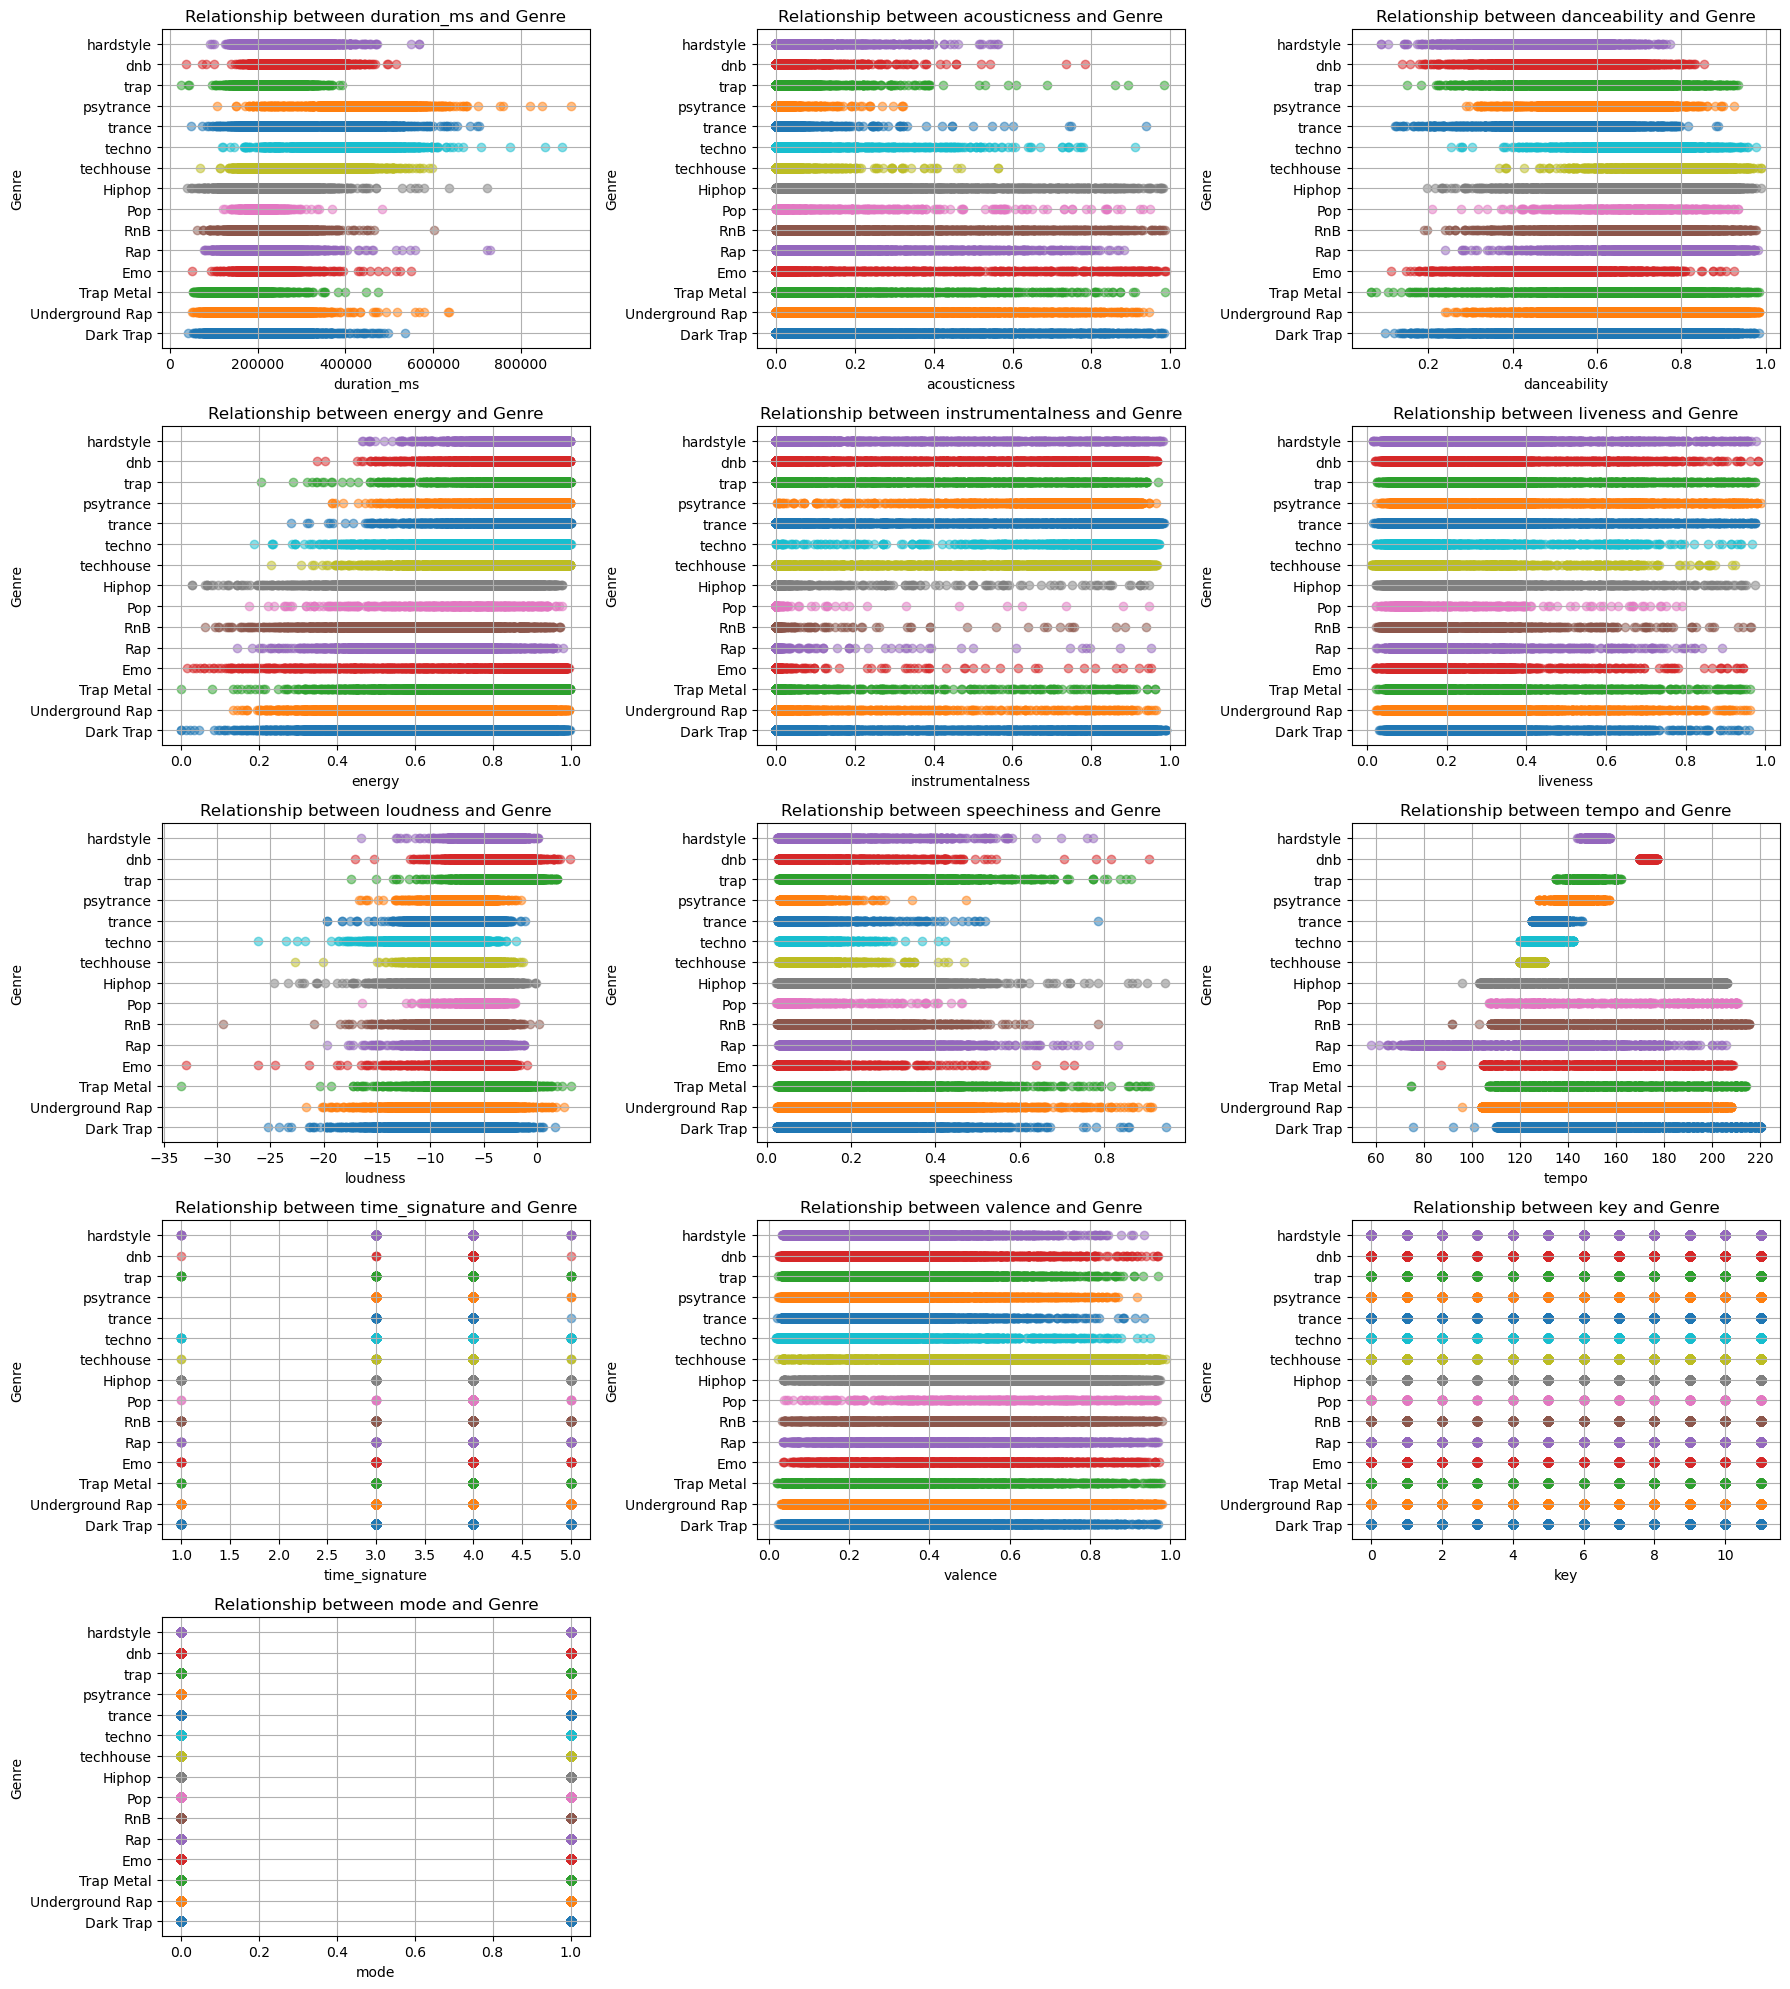

In [3]:
# Visualizing features 
# Calculate the number of rows and columns for subplots
num_features = len(features)
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 4 * num_rows))

# Separate scatter plots for each genre
for genre in label.unique():
    genre_data = song_data[song_data['genre'] == genre]
    
    for i, feature in enumerate(features):
        row_idx = i // num_cols
        col_idx = i % num_cols
        axes[row_idx, col_idx].scatter(genre_data[feature], genre_data['genre'], label=genre, alpha=0.5)
        axes[row_idx, col_idx].set_title(f'Relationship between {feature} and Genre')
        axes[row_idx, col_idx].set_xlabel(feature)
        axes[row_idx, col_idx].set_ylabel('Genre')
        axes[row_idx, col_idx].grid(True)

# Remove empty subplots
for i in range(num_features, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

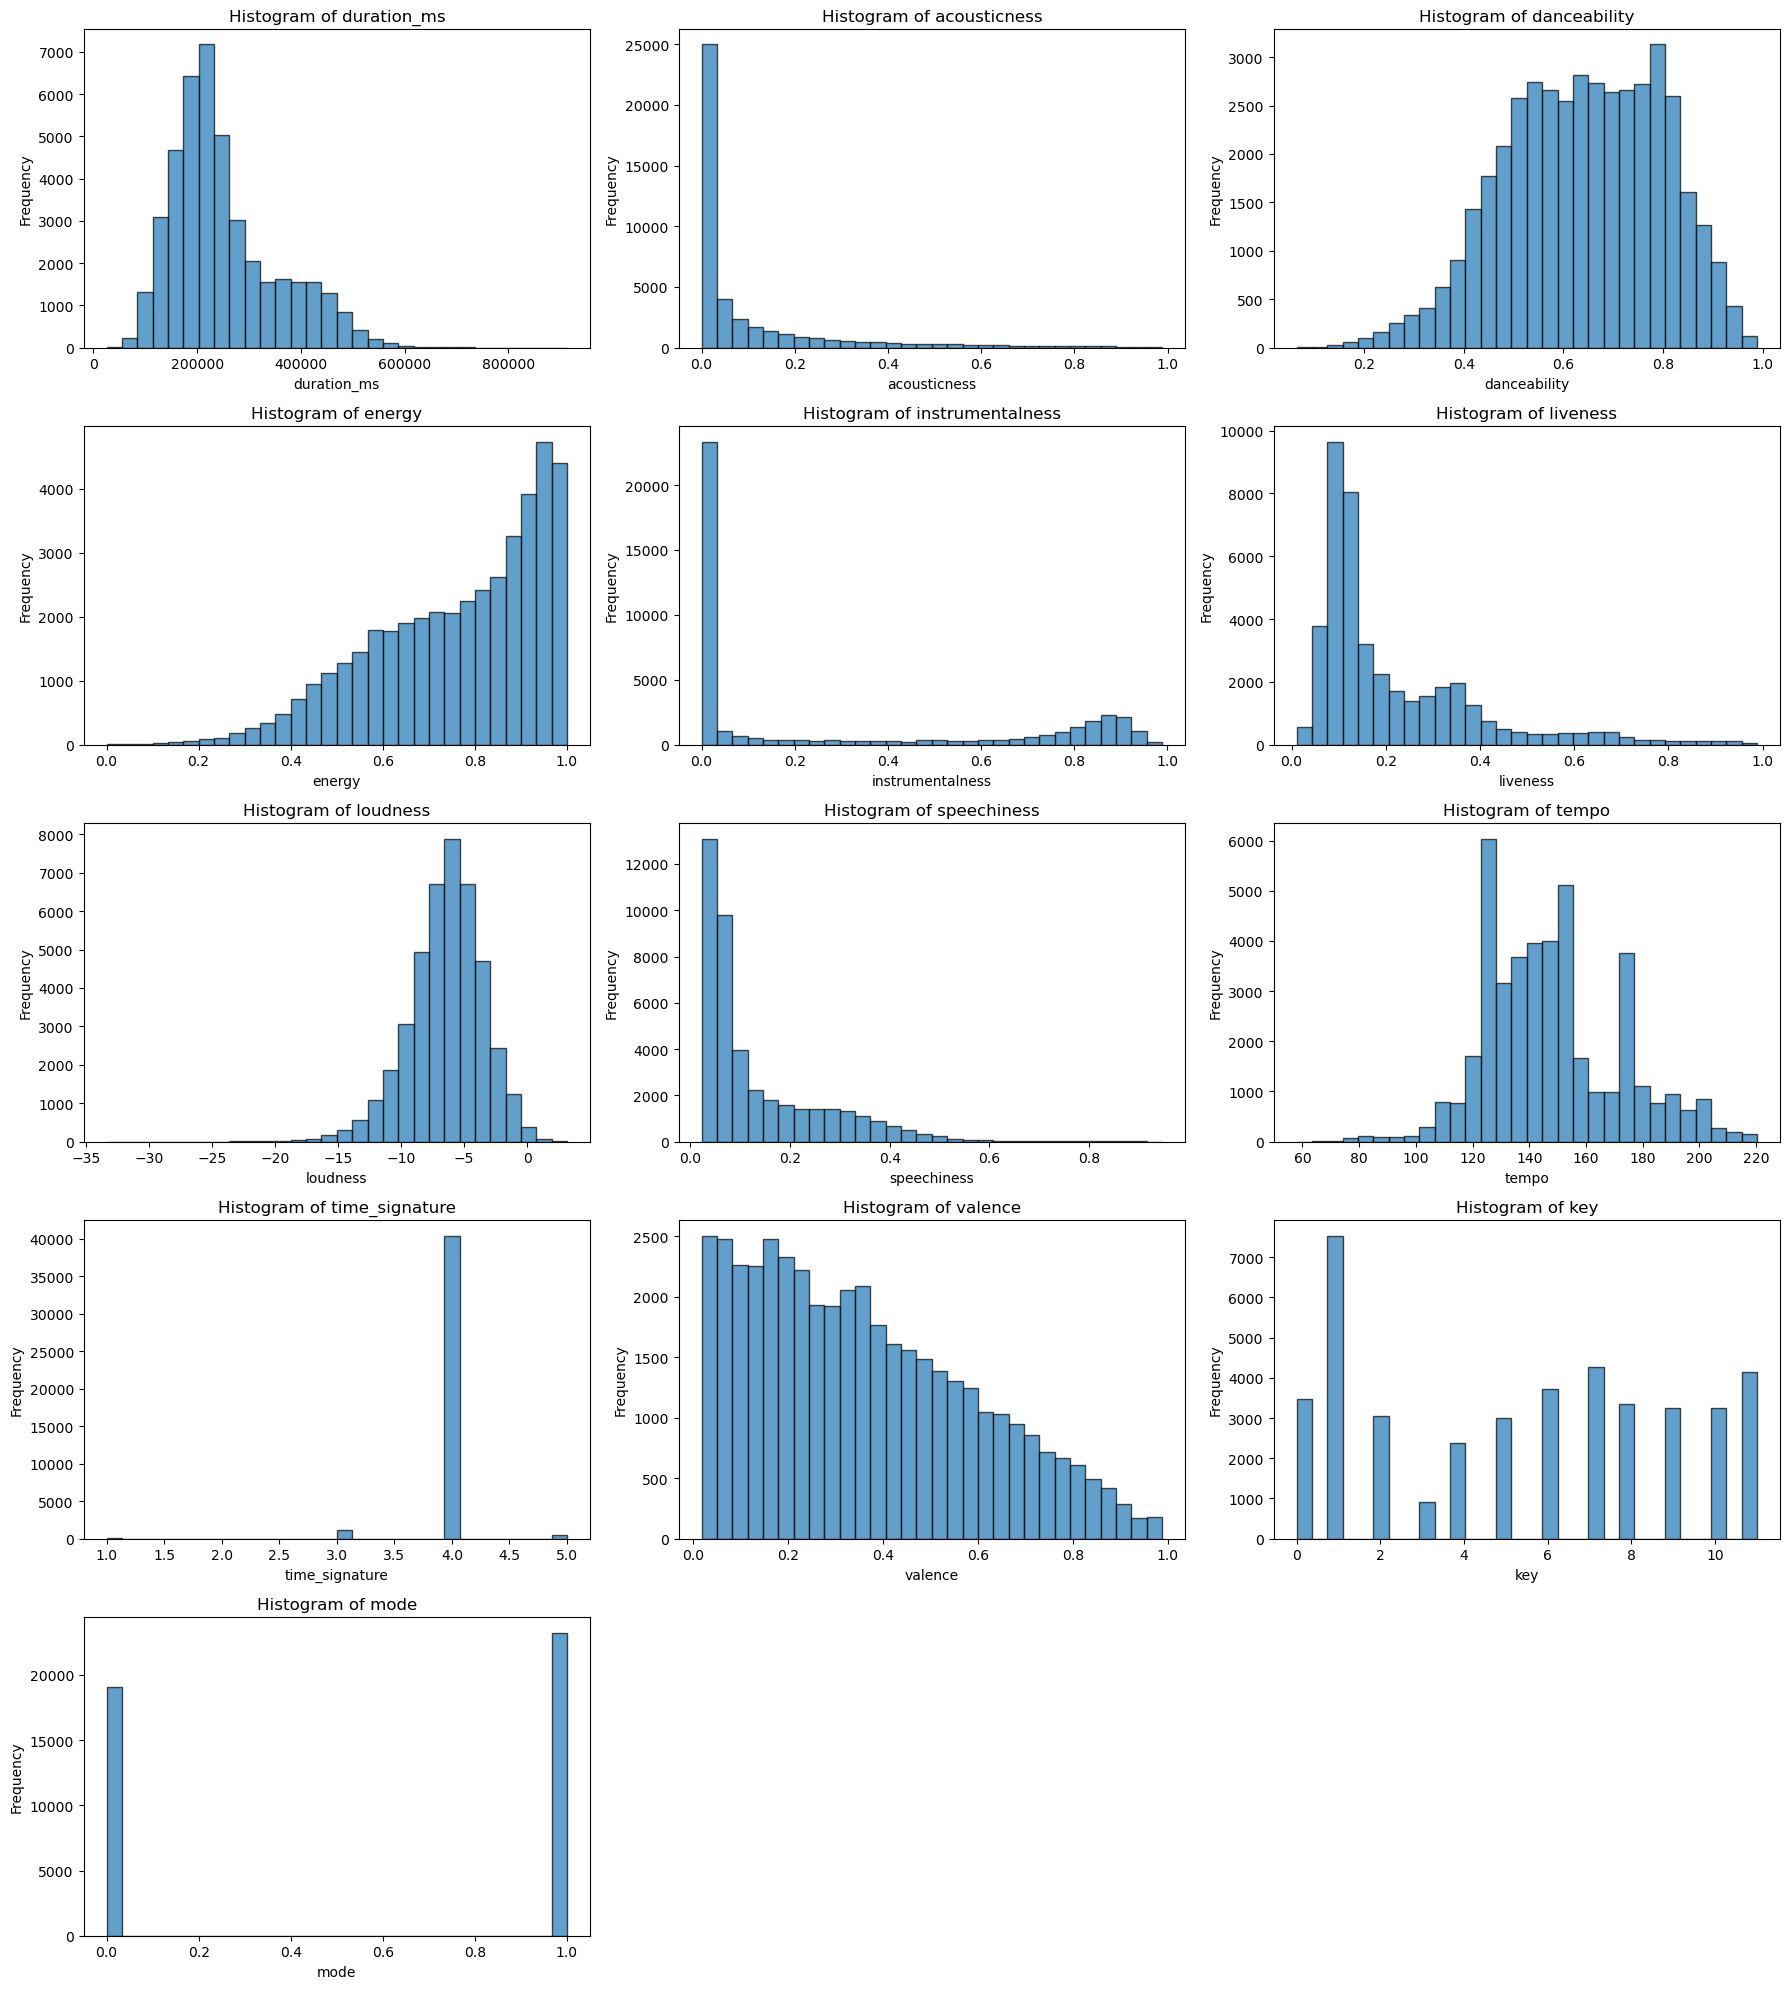

In [4]:
# Historgram for song_data
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 4 * num_rows))
axes = axes.flatten()

for i, feature in enumerate(features):
    axes[i].hist(song_data[feature], bins=30, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Remove empty subplots
for i in range(num_features, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

In [5]:
# Setting up Random Forest Model
X_train, X_test, y_train, y_test = train_test_split(song_data[features], label, test_size=0.2, random_state=42)

# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [6]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display additional evaluation metrics
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.67

Classification Report:
                 precision    recall  f1-score   support

      Dark Trap       0.54      0.46      0.50       970
            Emo       0.74      0.74      0.74       341
         Hiphop       0.42      0.41      0.42       621
            Pop       0.26      0.08      0.12        98
            Rap       0.47      0.32      0.38       341
            RnB       0.41      0.37      0.39       396
     Trap Metal       0.34      0.25      0.29       384
Underground Rap       0.39      0.52      0.44      1192
            dnb       0.96      0.98      0.97       599
      hardstyle       0.89      0.94      0.91       619
      psytrance       0.94      0.92      0.93       598
      techhouse       0.88      0.91      0.89       568
         techno       0.87      0.86      0.86       590
         trance       0.83      0.90      0.86       562
           trap       0.88      0.86      0.87       582

       accuracy                           0.67 

In [7]:
# Training for popularity prediction
popularity_data = pd.read_csv('song_data.csv', delimiter=',')

label = popularity_data['song_popularity']

# Split the data into training and testing sets
X = popularity_data[features]
y = popularity_data['song_popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features
degree = 2  
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create and fit a Linear regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict Labels for both training and testing
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Calculate the root mean squared error (RMSE) for both the training and testing data
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

print("Training Error (RMSE):", train_rmse)
print("Test Error (RMSE):", test_rmse)

Training Error (RMSE): 20.863311136894062
Test Error (RMSE): 21.044685309481604


In [10]:
# Final Prediction
print("From the following genres:")
print("Dark Trap, Emo, Hiphop, Pop, Rap, RnB, Trap Metal, Underground Rap, dnb, hardstyle, psytrance, techhouse, techno, trance, trap")
user_favorite_genre = input("Please enter your favorite genre: ")

# Make predictions using theP trained models
rf_pred = rf_model.predict(song_data[features])
song_data['predicted_genre'] = rf_pred

degree = 2 
poly = PolynomialFeatures(degree = degree)
poly_data = poly.fit_transform(song_data[features])

song_data['predicted_popularity'] = model.predict(poly_data)

# Filter songs based on predictions and user's favorite genre
filtered_data = song_data[(song_data['predicted_genre'] == user_favorite_genre) & (song_data['predicted_popularity'] > 20)]

# Sort the filtered data by popularity
filtered_data = filtered_data.sort_values(by='predicted_popularity', ascending=False)

# Display the top 4 songs
filtered_data = filtered_data[["genre", "song_name", "predicted_genre", "predicted_popularity"]]
filtered_data[0:4]


From the following genres:
Dark Trap, Emo, Hiphop, Pop, Rap, RnB, Trap Metal, Underground Rap, dnb, hardstyle, psytrance, techhouse, techno, trance, trap
Please enter your favorite genre: Pop


,genre,song_name,predicted_genre,predicted_popularity
18393,Pop,Run It!,Pop,71.046889
16347,RnB,Run It!,Pop,71.046889
18076,Pop,MYOB,Pop,67.930791
18105,Pop,Borat,Pop,67.679559
